# Visualización de dos clases linealmente separables, pero mal clasificadas  

## Metodología

1. obtener datos con módulo `datasets` 
2. configurar los datos para la clasificación binaria. (predictores y las etiquetas).
3. graficamos los datos como `plt.scatter()`
4. trazamos tres rectas clasificadoras que no corresponden a un SVM.

In [1]:
from sklearn import datasets # importamos el módulo datasets
iris = datasets.load_iris(as_frame = True) # importamos los datos utilizando la función load_iris()

In [2]:
type(iris)  
# es una estructura parecida a un diccionario, 
#es decir, odemos acceder a la información a través de palabras clave

sklearn.utils._bunch.Bunch

In [6]:
list(iris.keys())# obtener las claves o llaves para acceder a los datos a través del método .keys()

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
iris.data # con notación de punto obtengo los cuatro atributos predictores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris.feature_names # obtener la lista de nombres de los atributos

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
X = iris.data[['petal length (cm)', 'petal width (cm)']] # seleccionamos dos atributos predictores

In [11]:
X 

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [12]:
type(X.values)  # convertimos los predictores a ndarray

numpy.ndarray

In [13]:
y = iris.target # obtengo la variable objetivos y la creo como variable y

In [14]:
type(y) 

pandas.core.series.Series

In [15]:
y.values # convertir la Serie de pandas en un mdarray de numpy 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X = X.loc[:99] # método .loc[] para seleccionar filas del dataframe
y = y.loc[:99]

In [17]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
95,4.2,1.2
96,4.2,1.3
97,4.3,1.3
98,3.0,1.1


In [18]:
y # solo los tipos de flores setosa y versicolor 

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [19]:
import numpy as np 
import pandas as pd 
df = pd.DataFrame(np.c_[X.values, y.values], \
             columns = ['longitud', "ancho", "tipo"])

In [20]:
df 

,longitud,ancho,tipo
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


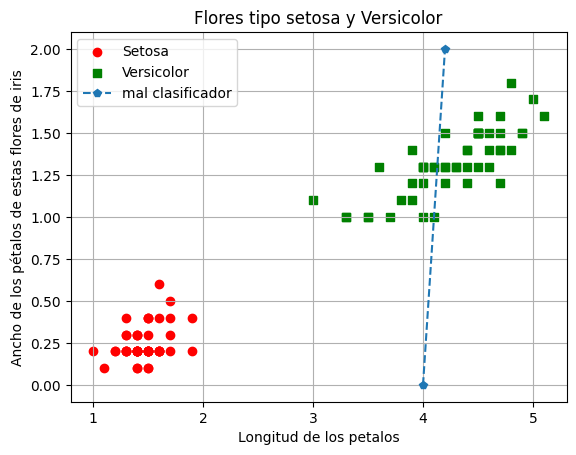

In [25]:
import matplotlib.pyplot as plt 

#grafiquemos la clase positiva o las flores tipo setosa

plt.figure()

plt.title('Flores tipo setosa y Versicolor')

plt.xlabel('Longitud de los petalos')

plt.ylabel('Ancho de los pétalos de estas flores de iris')
# graficas la clase positiva en rojo
plt.scatter(df.longitud.loc[:49], df.ancho.loc[:49], \
            color = 'red', marker = 'o', label = 'Setosa')
# https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
#grafica de la clase negativa con verde y estilo de cuadrados o square
plt.scatter(df.longitud.loc[50:99], df.ancho.loc[50:99], \
            color = 'green', marker = 's',\
           label = 'Versicolor')


plt.plot(dominio_linea_punteada, rango_linea_punteada,'p--', label = 'mal clasificador')


plt.legend(loc = 'upper left') 

plt.grid() 

# grafiquemos un mal clasificador 

dominio_linea_punteada = [4,4.2]
rango_linea_punteada = [0, 2.0]



# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
